<a href="https://colab.research.google.com/github/Evoltoooo/UAS_Andat/blob/main/UAS_ANDAT_DAFFA_HANIF_N_3333210093_Kelas_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/kapturovalexander/nvidia-amd-intel-asus-msi-share-prices

In [131]:
# https://drive.google.com/file/d/1npMzxpA5eaqOe8xuwx-Y8zgu4AvfgRc7/view?usp=drive_link

!gdown 1npMzxpA5eaqOe8xuwx-Y8zgu4AvfgRc7

Downloading...
From: https://drive.google.com/uc?id=1npMzxpA5eaqOe8xuwx-Y8zgu4AvfgRc7
To: /content/MSI (1962-2023).csv
100% 1.04M/1.04M [00:00<00:00, 160MB/s]


In [132]:
MSI_data = pd.read_csv('MSI (1962-2023).csv')
MSI_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-03,0.0,1.444702,1.427952,1.436327,0.632343,77611
1,1962-01-04,0.0,1.438421,1.411202,1.423765,0.626812,59701
2,1962-01-05,0.0,1.432140,1.394452,1.415390,0.623125,107462
3,1962-01-08,0.0,1.432140,1.390264,1.390264,0.612063,89551
4,1962-01-09,0.0,1.402827,1.356764,1.356764,0.597315,83581


Check missing values

In [133]:
MSI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15424 entries, 0 to 15423
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15424 non-null  object 
 1   Open       15424 non-null  float64
 2   High       15424 non-null  float64
 3   Low        15424 non-null  float64
 4   Close      15424 non-null  float64
 5   Adj Close  15424 non-null  float64
 6   Volume     15424 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 843.6+ KB


Kodingan di atas digunakana untuk melihat apakah ada missing value dari dataset

Check statistic vales for every features

In [134]:
MSI_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,1.542400e+04
mean,44.977492,46.412619,45.224755,45.825400,37.652783,1.997183e+06
std,54.883169,54.841002,53.578205,54.222402,51.144917,2.347513e+06
min,0.000000,0.866821,0.808196,0.845884,0.376771,0.000000e+00
25%,3.768789,5.175804,5.025052,5.100428,2.625478,5.059500e+05
50%,23.517244,23.856436,23.230058,23.554932,16.259139,1.294556e+06
75%,67.235199,67.988953,66.486078,67.235199,52.269761,2.627212e+06
max,286.209991,287.420013,283.739990,286.140015,286.140015,4.717163e+07


Kodingan di atas digunakan untuk melihat hasil statistika dari dataset

Handle datetime data for time series

In [135]:
MSI_data['Date'] = pd.to_datetime(MSI_data['Date'])
MSI_data.set_index('Date', inplace=True)
MSI_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-03,0.0,1.444702,1.427952,1.436327,0.632343,77611
1962-01-04,0.0,1.438421,1.411202,1.423765,0.626812,59701
1962-01-05,0.0,1.432140,1.394452,1.415390,0.623125,107462
1962-01-08,0.0,1.432140,1.390264,1.390264,0.612063,89551
1962-01-09,0.0,1.402827,1.356764,1.356764,0.597315,83581


Kodingan di atas digunakan untuk membuat kolom *Time* menjadi *datetime*, kemudian membuat kolom *date* menjadi index

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

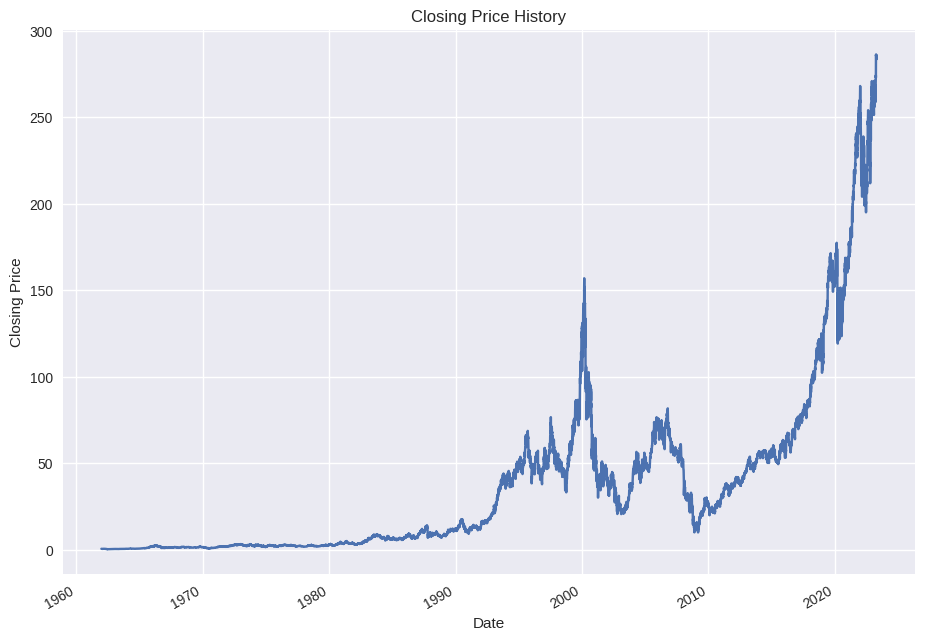

In [136]:
plt.figure(figsize=(11, 8)) # resizing the plot
MSI_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Kodingan di atas digunakan untuk menampilkan grafik dari kolom *closing*. Berdasarkan grafik diatas, bisa disimpulkan bahwa grafik memiliki kecendurungan naik

<Figure size 1600x800 with 0 Axes>

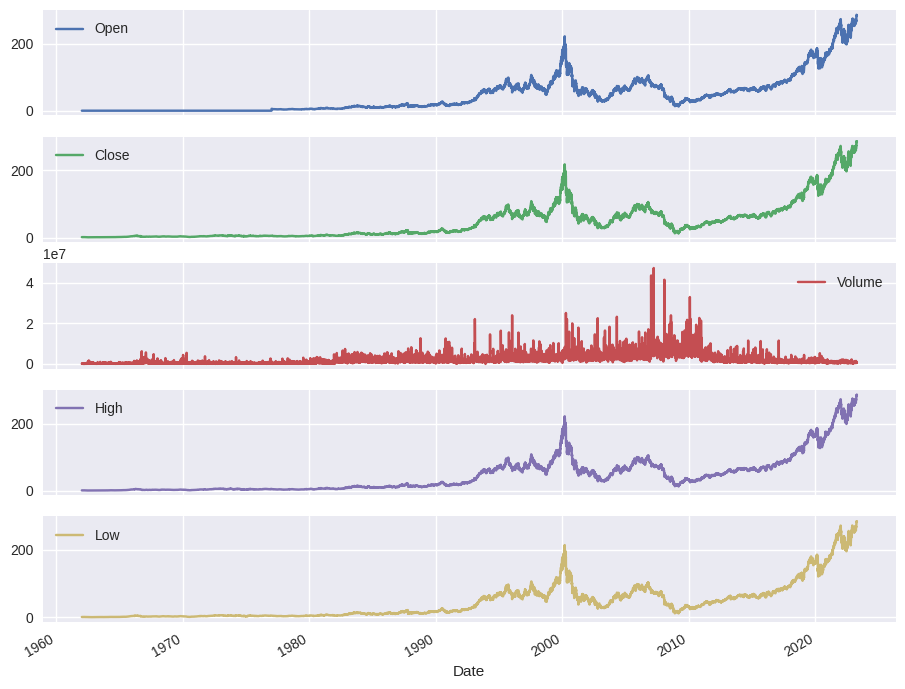

In [137]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = MSI_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Kodingan di atas digunakan untuk melihat grafik dari kolom data lainnya, berdasrkarn grafik-grafik diatas memiliki kecenderungan naik, namu tidak untuk volume yang naik turun.

In [138]:
MSI_data['HL_PCT'] = (MSI_data['High'] - MSI_data['Low']) / MSI_data['Low'] * 100.0
MSI_data['PCT_change'] = (MSI_data['Close'] - MSI_data['Open']) / MSI_data['Open'] * 100.0

In [139]:
df = MSI_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

In [140]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

772


<ipython-input-140-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Kodingan diatas digunakan untuk membuat adj close nya menjadi index, karena adj close merupakan hal yuang menentukan apakah data pembelian VGA MSI naik atau turun

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [142]:
X = np.array(df.drop(['label'], 1))

# Identifikasi dan penanganan nilai infinite
X[np.isinf(X)] = np.nan
X = np.nan_to_num(X)

# Scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-142-ce16dad6182d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Kodingan diatas digunakan digunakan untuk mengnormalisasi dataset. Karena di dataset yang digunakan terdapat nilai* infite*, kita ganti nilai tersebut dengan NaN.

In [143]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [144]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-144-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Dua kodingan di atas digunakan untuk menentukan x, dan y. Untuk x kita lakukan *slicing*, sedangkan y kita gunakan label

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kodingan ini dugakan untuk melakukan *spliting*

In [146]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [147]:
lr_confidence

0.6567529319906402

Dua kodingan diatas digunakna untuk melakukan *Linear Regression*, dan didapatkan nilai regresinya sebesar 0.6567529319906402

In [148]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [149]:
rf_confidence

0.899224890610762

Dua kodingan diatas digunakna untuk melakukan *Random Forest Regression*, dan didapatkan nilai regresinya sebesar 0.8985687317196747

In [150]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-150-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-150-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-150-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(

Kodingan di atas digunakan untuk melakukan trainning untuk melakukan forecasting

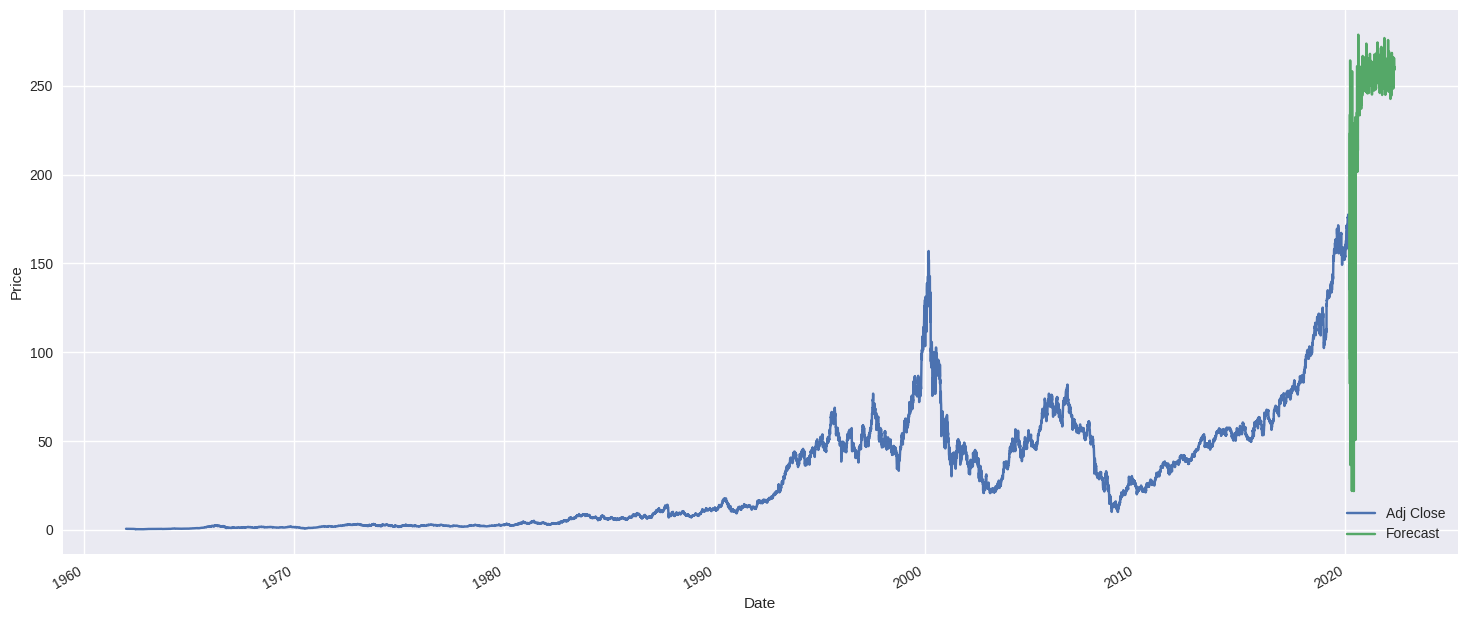

In [151]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Kodingan diatas dilakukan untuk menampilka hasil forecasting, berdasarkan grafik diatas bisa dismpulkan bahwa harga VGA MSI akan terjadi penuran yang drastis namun akan naik ke atas lagi